In [2]:
import yfinance as yf  # Import Yahoo Finance library to fetch stock data
import pandas as pd  # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for improved visualization

In [3]:
# Function to fetch stock data
def get_stock_data(ticker, period='1mo', interval='1d'):
    stock = yf.Ticker(ticker)  # Create a stock object using the ticker symbol
    data = stock.history(period=period, interval=interval)  # Fetch historical stock data
    return data  # Return the data as a DataFrame

In [4]:
# Function to plot stock price movement
def plot_stock_movement(data, ticker):
    plt.figure(figsize=(12, 6))  # Set figure size
    sns.lineplot(data=data, x=data.index, y='Close', label='Closing Price')  # Plot closing price
    plt.title(f'Stock Price Movement of {ticker}')  # Set title
    plt.xlabel('Date')  # Label for x-axis
    plt.ylabel('Closing Price (USD)')  # Label for y-axis
    plt.grid(True)  # Enable grid for better readability
    plt.legend()  # Display legend
    plt.show()  # Show the plot

In [5]:
# Function to calculate and plot moving averages
def plot_moving_averages(data, ticker, short_window=5, long_window=20):
    data['Short MA'] = data['Close'].rolling(window=short_window).mean()  # Calculate short-term moving average
    data['Long MA'] = data['Close'].rolling(window=long_window).mean()  # Calculate long-term moving average

    plt.figure(figsize=(12, 6))  # Set figure size
    plt.plot(data.index, data['Close'], label='Closing Price', color='blue')  # Plot closing price
    plt.plot(data.index, data['Short MA'], label=f'{short_window}-Day MA', color='red')  # Plot short MA
    plt.plot(data.index, data['Long MA'], label=f'{long_window}-Day MA', color='green')  # Plot long MA
    plt.title(f'Moving Averages for {ticker}')  # Set title
    plt.xlabel('Date')  # Label for x-axis
    plt.ylabel('Price (USD)')  # Label for y-axis
    plt.legend()  # Display legend
    plt.grid(True)  # Enable grid for readability
    plt.show()  # Show the plot

Enter stock ticker symbol (e.g., AAPL, TSLA): AAPL
                                 Open        High         Low       Close  \
Date                                                                        
2025-03-03 00:00:00-05:00  241.789993  244.029999  236.110001  238.029999   
2025-03-04 00:00:00-05:00  237.710007  240.070007  234.679993  235.929993   
2025-03-05 00:00:00-05:00  235.419998  236.550003  229.229996  235.740005   
2025-03-06 00:00:00-05:00  234.440002  237.860001  233.160004  235.330002   
2025-03-07 00:00:00-05:00  235.110001  241.369995  234.759995  239.070007   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-03-03 00:00:00-05:00  47184000        0.0           0.0  
2025-03-04 00:00:00-05:00  53798100        0.0           0.0  
2025-03-05 00:00:00-05:00  47227600        0.0           0.0  
2025-03-06 00:00:00-05:00  45170400        0.0           0.0  
2025-03-07 00:00:00-05:00  4624

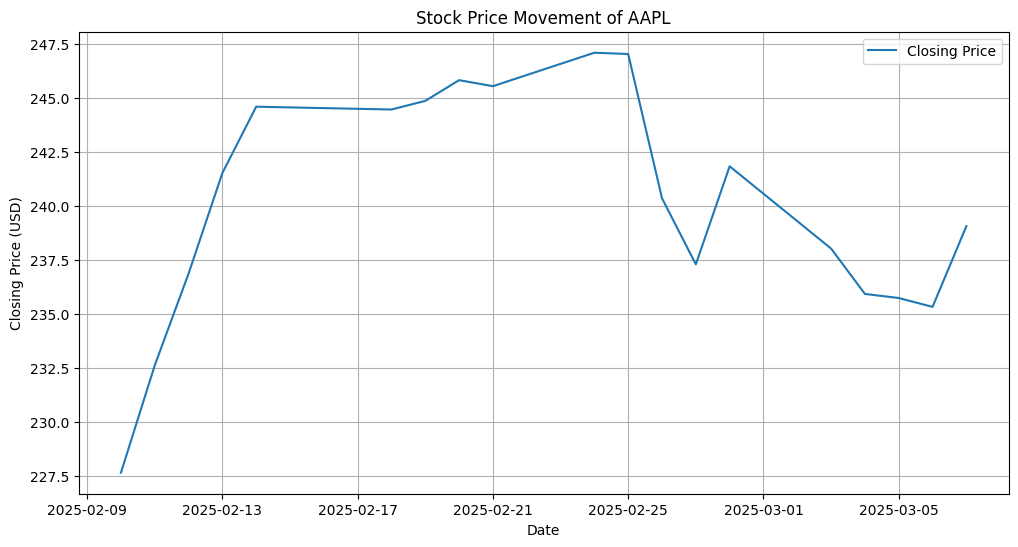

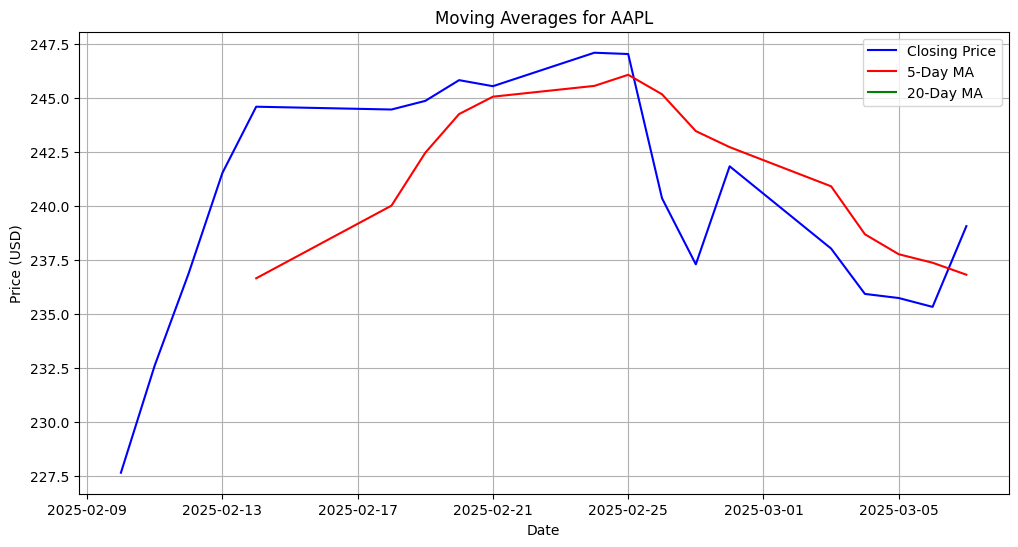

In [6]:
# Main function to fetch data and plot trends
def main():
    ticker = input("Enter stock ticker symbol (e.g., AAPL, TSLA): ").upper()  # Get stock symbol from user
    period = '1mo'  # Define the period to fetch data (1 month)
    interval = '1d'  # Define the interval (daily data)

    stock_data = get_stock_data(ticker, period, interval)  # Fetch stock data
    if stock_data.empty:
        print("Invalid ticker symbol or no data available.")  # Check for empty data
        return

    print(stock_data.tail())  # Display the last few rows of stock data
    plot_stock_movement(stock_data, ticker)  # Plot stock price movement
    plot_moving_averages(stock_data, ticker)  # Plot moving averages

# Run the script if executed in Google Colab
if __name__ == "__main__":
    main()  # Call the main function to execute the script
